## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

Параметр stratify отвечает за равенство распределения классов в надорах данных test и train.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [18]:
X_train = X_train[["alcohol", "magnesium"]]
X_test = X_test[["alcohol", "magnesium"]]
X_train_norm = pd.DataFrame(data= StandardScaler().fit_transform(X_train), columns = ["alcohol", "magnesium"])
X_test_norm = pd.DataFrame(data= StandardScaler().fit_transform(X_test), columns = ["alcohol", "magnesium"])
X_train_norm.head(5)

,alcohol,magnesium
0,0.712259,-0.504327
1,0.882292,2.341479
2,0.845856,0.135979
3,0.578661,0.776285
4,-0.526554,-0.362037


In [19]:
print(f'{"NN":<5}{"Train":<7} Test')
for k in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train_norm, Y_train)

    Y_predicted_train = clf.predict(X_train_norm)
    Y_predicted_test = clf.predict(X_test_norm)

    val_accuracy1 = np.mean(Y_predicted_train == Y_train)
    val_accuracy2 = np.mean(Y_predicted_test == Y_test)
    print(f'{k:<4} {val_accuracy1:<7.2f} {val_accuracy2:.2f}')

NN   Train   Test
1    0.99    0.67
3    0.80    0.81
5    0.77    0.76
10   0.78    0.72
15   0.73    0.78
25   0.72    0.72


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [20]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [21]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

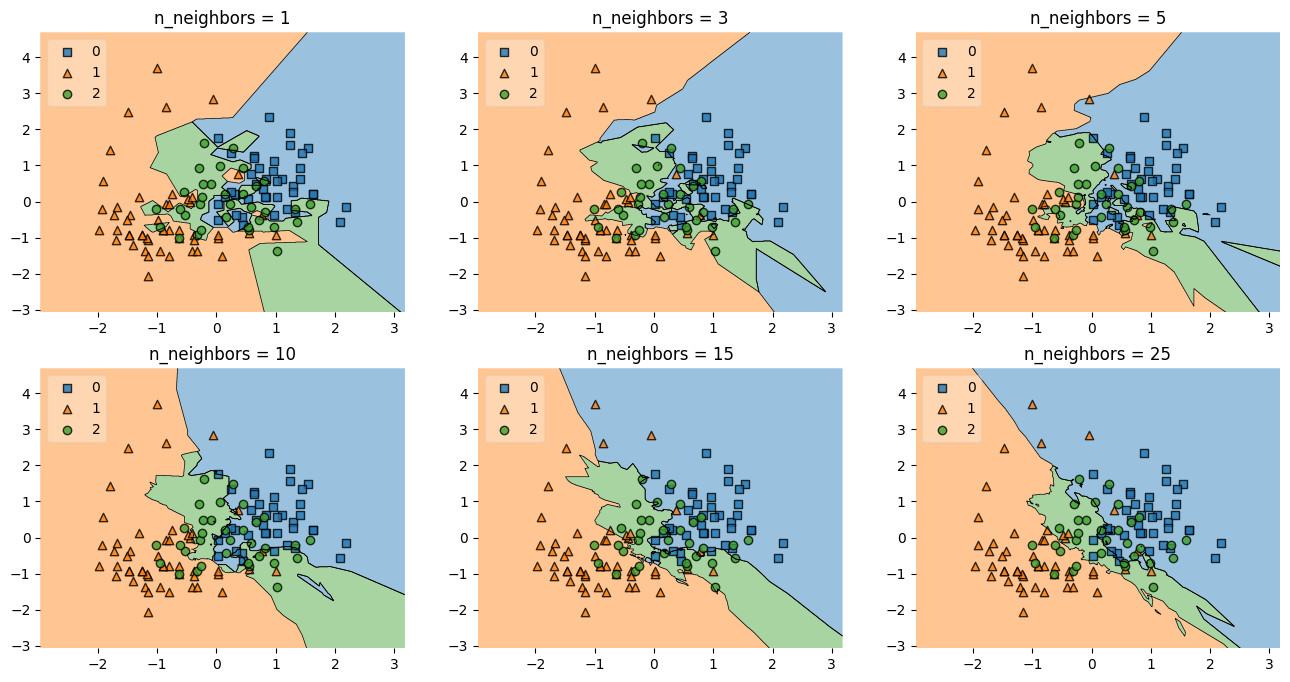

In [22]:
from mlxtend.plotting import plot_decision_regions
from sklearn import neighbors
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(16, 8))

x = X_train_norm.to_numpy()
y = Y_train
for k, grd in zip([1, 3, 5, 10, 15, 25], itertools.product([0, 1], [0, 1, 2])):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x, y=y, clf=clf, legend=2)
    plt.title(f'n_neighbors = {str(k)}')

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

В задании 1.3 можем наблюдать явление переобучения при 1 соседе.А вот уже при 3 соседях получаем лучший результат на тестовой выборке. Достаточно хорошие результаты получились на 15 и 5 соседях 0.78 и 0.76 доля верных ответов.
В задании 1.5 можем только убедить правильность выводов из предыдущего задания при к=3, 5, 15 деление на классы ровное (не бито линиями).

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

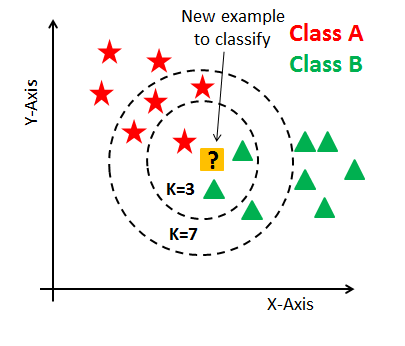

In [24]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      pred = []
      for i in range(np.shape(X)[0]):
        dis = np.sqrt(np.sum((self.X_train - X[i, :])**2, axis=1))
        neighbors = self.y_train[np.argsort(dis)[:self.k]]
        pred = np.append(pred, Counter(neighbors).most_common(1)[0][0])
      return pred

In [25]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [26]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [27]:
data = pd.read_csv("https://github.com/hse-ds/iad-intro-ds/raw/master/2024/homeworks/hw04_knn_linreg/diamonds.csv")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [28]:
data = data.drop(["Unnamed: 0"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

<ipython-input-29-44c9c39d5e32>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


<Axes: >

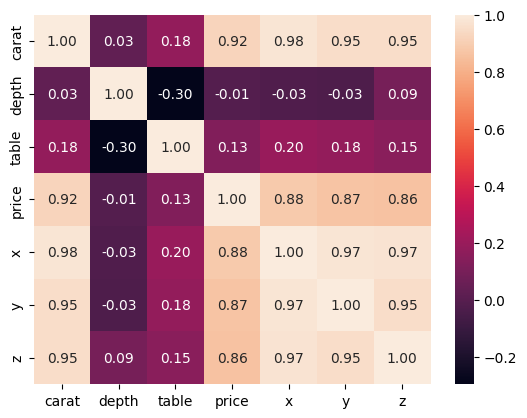

In [29]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, fmt=".2f")

Наибольшая корреляция у признаков: веса(карат) и параметров объема(x, y, z)

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [30]:
X = data[["carat", "cut",	"color", "clarity", "depth", "table", "x", "y", "z"]]
y = data["price"]
X = pd.get_dummies(X, drop_first=True)
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,  random_state = 0)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [32]:
from sklearn.preprocessing import StandardScaler

X_train_norm = pd.DataFrame(StandardScaler().fit(X_train).transform(X_train), columns = X_train.columns)
X_test_norm = pd.DataFrame(StandardScaler().fit(X_test).transform(X_test), columns = X_test.columns)
X_train_norm.head(3)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461,-0.316757,1.223205,-0.584466,-0.536788,...,-0.424712,-0.335399,-0.232918,-0.185726,-0.565871,-0.453467,2.379167,-0.542516,-0.269914,-0.321994
1,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486,-0.316757,1.223205,-0.584466,-0.536788,...,2.354538,-0.335399,-0.232918,-0.185726,-0.565871,-0.453467,-0.420315,-0.542516,-0.269914,3.105648
2,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576,-0.316757,-0.817524,-0.584466,1.862933,...,-0.424712,-0.335399,-0.232918,-0.185726,-0.565871,2.205231,-0.420315,-0.542516,-0.269914,-0.321994


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
lr = linear_model.LinearRegression().fit(X_train_norm, Y_train)
print(f"Train: {mean_squared_error(Y_train, lr.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(Y_test, lr.predict(X_test_norm))}")

Train: 1284661.862119126
Test: 1258842.0040804397


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [34]:
for i in range(6):
  print(f"{X_train_norm.columns[i]}: {lr.coef_[i]}")

carat: 5278.119983938968
depth: -94.26693610935286
table: -65.61837226838071
x: -1050.0247597557159
y: -2.647379706641582
z: -40.56862298890186


коэффициэнты: вес камня, длина по оси х - на три порядка выше остальных параметров

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [36]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(10).fit(X_train_norm, Y_train)
print("Lasso")
for i in range(6):
  print(f"{X_train_norm.columns[i]}: {lasso.coef_[i]}")
ridge = Ridge(5.0).fit(X_train_norm, Y_train)
print("\nRidge")
for i in range(6):
  print(f"{X_train_norm.columns[i]}: {ridge.coef_[i]}")

Lasso
carat: 4784.582238082588
depth: -100.46417418739726
table: -76.80709350530448
x: -603.5249137967455
y: -0.0
z: -40.09153588912461

Ridge
carat: 5258.9568871308975
depth: -93.35392574925076
table: -65.70484954248974
x: -1029.1693040892578
y: -3.5989910308937043
z: -42.357334917153565


В случае Lasso регуляризации веса действительно уменьшили, у одно из признаков вес занулился, но порядок остался примерно таким же, сильных изменений не произошло.

В Ridge регуляризации веса остались такими же с точность до второго порядка

Т.к. в Lasso регуляризации занулился один признак, можно сказать, что признаки линейно зависимы

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

[6616.7815213273625, 6496.86316092685, 5392.040825022614, 3872.5887911504474, 3581.3801826865]
[6629.490572043261, 6623.088919344791, 6560.12632283907, 6019.933298644669, 5560.528064692238]


Text(0.5, 1.0, 'Ridge')

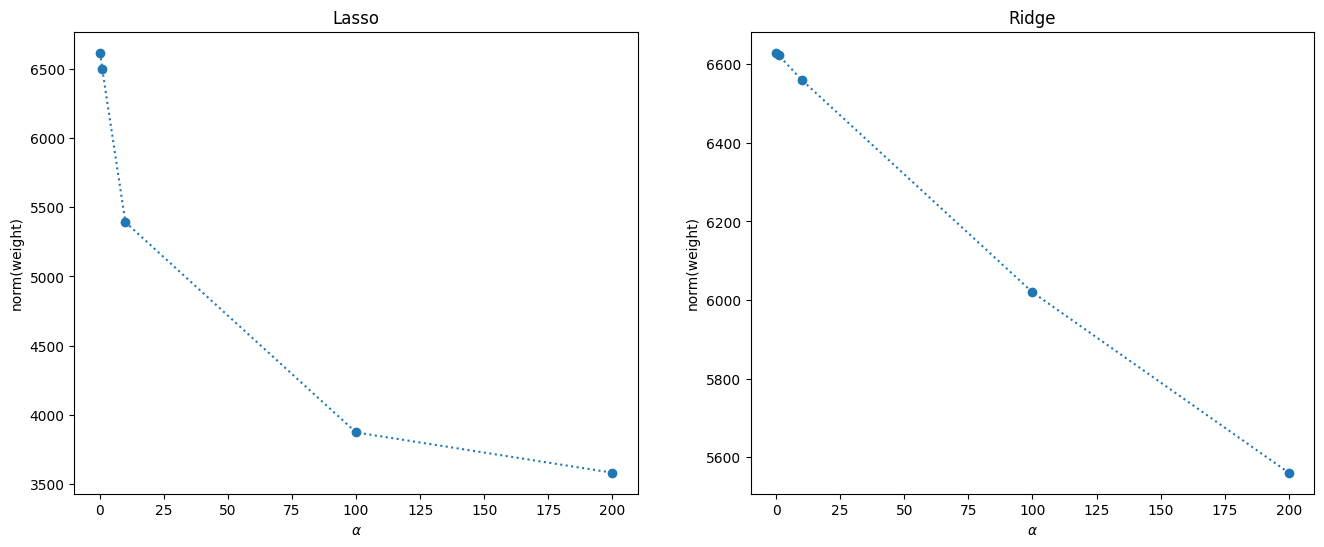

In [37]:
plt.figure(figsize=(16,6))
alpha = [0.1, 1, 10, 100, 200]
weight = [np.linalg.norm(Lasso(i).fit(X_train_norm, Y_train).coef_) for i in alpha]
print(weight)

plt.subplot(121)
plt.plot(alpha, weight, ':o')
plt.xlabel("$\\alpha$")
plt.ylabel("norm(weight)")
plt.title("Lasso")

weight2 = [np.linalg.norm(Ridge(i).fit(X_train_norm, Y_train).coef_) for i in alpha]
print(weight2)

plt.subplot(122)
plt.plot(alpha, weight2, ':o')
plt.xlabel("$\\alpha$")
plt.ylabel("norm(weight)")
plt.title("Ridge")

Из графиков видно, что Lasso регуляризация уменьшает веса "агрессивнее", приче чем больше коэффициэн регуляризации тем меньше веса

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [38]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, alphas=alpha)
lasso_cv.fit(X_train_norm, Y_train)
mean = np.mean(lasso_cv.mse_path_, axis = 1)
min = np.min(mean)
in_min = np.argmin(mean)
print(lasso_cv.alphas_[in_min])
print(min)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139598866.5661163, tolerance: 48309472.87280814
  model = cd_fast.enet_coordinate_descent_gram(


1.0
1288260.086926341


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [39]:
lasso_a = Lasso(lasso_cv.alphas_[in_min]).fit(X_train_norm, Y_train)
for i in range(len(lasso_a.coef_)):
  print(f"{X_train_norm.columns[i]}: {lasso_a.coef_[i]}")

carat: 5228.560861327306
depth: -94.8189915359666
table: -66.71608978872675
x: -1007.1984643717989
y: -0.0
z: -40.842177314700024
cut_Good: 143.6201782928738
cut_Ideal: 369.5525069557348
cut_Premium: 295.9949283208313
cut_Very Good: 274.12993972869566
color_E: -62.50195326018359
color_F: -84.22618827905447
color_G: -174.92918159947368
color_H: -332.29826529638075
color_I: -423.54470024162134
color_J: -511.86764625263174
clarity_IF: 926.9424014509593
clarity_SI1: 1501.9793661275978
clarity_SI2: 954.5043615135327
clarity_VS1: 1580.3735214619137
clarity_VS2: 1721.2895525618026
clarity_VVS1: 1221.138673185174
clarity_VVS2: 1396.640809789564


Наиболее информативны: вес, длина по х, прозрачность камня

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [40]:
print(f"lasso: {mean_squared_error(Y_test, lasso_a.predict(X_test_norm))}")
print(f"lin_reg: {mean_squared_error(Y_test, lr.predict(X_test_norm))}")

lasso: 1260899.7722159661
lin_reg: 1258842.0040804397


Если смотреть на MSE модели с регуляризацией и модели без ней, то результаты похожи, но все же модель без регуляризации на конкретно нашей выборке оказалась лучше. Большое влияние на предсказание оказывают несколько признаков, это вес, прозрачность и размер камня. Именно у этих признаков большие веса, хоть с регуляризацией, хоть без нее они оказываются большими и смысла как-то сильно уменьшать веса нет.